In [ ]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime

In [10]:
today = datetime.now().strftime("%Y-%m-%d")
PG = yf.download("PG", start="1995-01-01", end=today, auto_adjust=False)

[*********************100%***********************]  1 of 1 completed


In [11]:
PG.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,PG,PG,PG,PG,PG,PG
Date,,,,,,
1995-01-03,7.350255,15.59375,15.62500,15.43750,15.46875,3318400
1995-01-04,7.291330,15.46875,15.65625,15.31250,15.53125,2218800
1995-01-05,7.188221,15.25000,15.43750,15.21875,15.37500,2319600
1995-01-06,7.202950,15.28125,15.40625,15.15625,15.15625,3438000
1995-01-09,7.173488,15.21875,15.40625,15.18750,15.34375,1795200


In [12]:
PG.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,PG,PG,PG,PG,PG,PG
Date,,,,,,
2025-06-27,159.860001,159.860001,160.130005,158.289993,158.679993,19257000
2025-06-30,159.320007,159.320007,159.899994,158.130005,159.259995,11238200
2025-07-01,161.220001,161.220001,162.529999,159.380005,159.880005,10664900
2025-07-02,161.199997,161.199997,161.350006,159.860001,161.139999,8848700
2025-07-03,160.830002,160.830002,162.020004,159.789993,161.789993,6999600


In [13]:
print(f"Data shape: {PG.shape}")
print(f"First date: {PG.index[0]}")
print(f"Last date: {PG.index[-1]}")
print(f"Total days: {len(PG)}")

Data shape: (7677, 6)
First date: 1995-01-03 00:00:00
Last date: 2025-07-03 00:00:00
Total days: 7677


In [21]:
PG["simple_return"] = (PG["Adj Close"]["PG"] / PG["Adj Close"]["PG"].shift(1)) - 1
print(PG["simple_return"])

Date
1995-01-03         NaN
1995-01-04   -0.008017
1995-01-05   -0.014141
1995-01-06    0.002049
1995-01-09   -0.004090
                ...   
2025-06-27    0.007754
2025-06-30   -0.003378
2025-07-01    0.011926
2025-07-02   -0.000124
2025-07-03   -0.002295
Name: simple_return, Length: 7677, dtype: float64


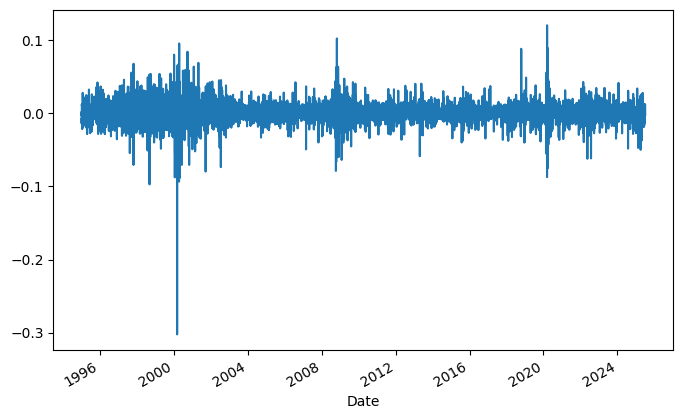

In [32]:
PG["simple_return"].plot(figsize=(8, 5))
plt.show()

In [34]:
PG["log_return"] = np.log(PG["Adj Close"]["PG"] / PG["Adj Close"]["PG"].shift(1))
print(PG["log_return"])

Date
1995-01-03         NaN
1995-01-04   -0.008049
1995-01-05   -0.014242
1995-01-06    0.002047
1995-01-09   -0.004099
                ...   
2025-06-27    0.007724
2025-06-30   -0.003384
2025-07-01    0.011855
2025-07-02   -0.000124
2025-07-03   -0.002298
Name: log_return, Length: 7677, dtype: float64


<Axes: xlabel='Date'>

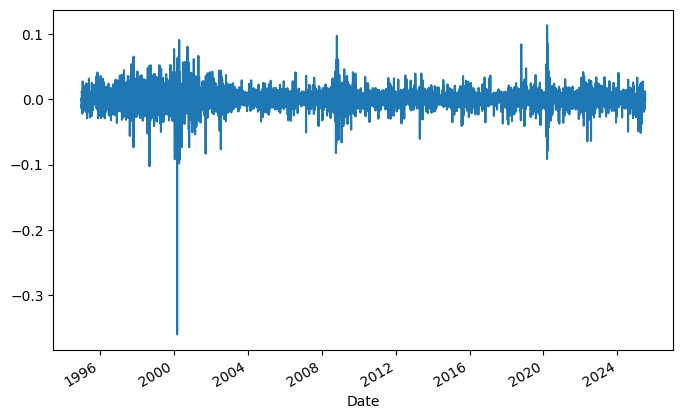

In [ ]:
PG["log_return"].plot(figsize=(8, 5))

In [ ]:
log_return_d = PG["log_return"].mean()
log_return_d

np.float64(0.00040198188829642864)

In [ ]:
log_return_a = PG["log_return"].mean() * 250
log_return_a

np.float64(0.10049547207410717)

In [41]:
print(str(round(log_return_a, 5) * 100) + " %")

10.05 %
